In [1]:
import sys
sys.path.insert(0, "/cndd/fangming/CEMBA/snmcseq_dev")

from multiprocessing import Pool,cpu_count
from functools import partial

from scipy import sparse
from scipy import stats
import importlib
from __init__ import *
from __init__jupyterlab import *
import snmcseq_utils
importlib.reload(snmcseq_utils)

import pickle
import datetime

# Todo


# Plot massive 

In [281]:
import sys
sys.path.insert(0, "/cndd/fangming/CEMBA/snmcseq_dev")

from multiprocessing import Pool,cpu_count
from functools import partial

from scipy import sparse
from scipy import stats
import importlib
from __init__ import *
from __init__jupyterlab import *
import snmcseq_utils
importlib.reload(snmcseq_utils)

import pickle
import datetime
from scipy import optimize
import re

In [213]:
today = datetime.date.today()
print(today)

2020-08-04


In [214]:
input_enh_gene_table = '/cndd2/fangming/projects/scf_enhancers/results/200521_to_evals.tsv' 
output_corr_format = '/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_ka{}_k{}_200803_2020-08-03_corrs.pkl'
output_to_correlate_format = "/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_ka{}_k{}_200803_2020-08-03_corrs_idx.pkl"

output_figure1 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_num_sig_dependency_ka_k_v1.pdf'.format(today)
output_figure2 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_num_sig_dependency_ka_k_v2.pdf'.format(today)
output_figure3 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_num_sig_dependency_ka_k_v3.pdf'.format(today)
output_figure4 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_num_sig_dependency_ka_k_v4.pdf'.format(today)

In [215]:
# enhancer-gene linkage
enhancer_gene_to_eval = pd.read_csv(input_enh_gene_table, sep='\t')
print(enhancer_gene_to_eval.shape)
enhancer_gene_to_eval.head()

(2589994, 18)


,gene,ens,val,val2,val_clustershuffled,val2_clustershuffled,dist,pvalues,fdr<100kb,fdr<200kb,fdr<500kb,fdr<100kb shuffled (cluster label),pvalues2,fdr2<100kb,fdr2<200kb,fdr2<500kb,fdr2<100kb shuffled (cluster label),val_both
0,ENSMUSG00000000001,147520,-0.157895,0.127913,-0.169712,-0.049349,995118,0.288079,0.674683,0.736811,0.827139,1.647931,0.383141,0.745977,0.797076,0.872822,1.955898,-0.285808
1,ENSMUSG00000000001,147522,0.027465,-0.307145,0.064887,0.105591,985740,0.561881,0.830849,0.867082,0.917381,0.958300,0.935264,0.973809,0.979844,0.987476,0.959470,0.334610
2,ENSMUSG00000000001,147523,-0.040376,0.011489,-0.155487,0.014772,983725,0.457686,0.780196,0.825259,0.889141,1.089312,0.580703,0.841673,0.874844,0.922832,1.273339,-0.051866
3,ENSMUSG00000000001,147527,-0.070795,0.111719,-0.088084,0.184594,970444,0.411564,0.755088,0.804341,0.874375,1.183332,0.410358,0.761056,0.809464,0.880982,1.812516,-0.182514
4,ENSMUSG00000000001,147528,0.012583,0.150673,-0.036218,0.147609,969372,0.539123,0.819981,0.858026,0.911467,0.979843,0.345993,0.725803,0.780447,0.862033,2.191506,-0.138090


In [216]:
# # 

# ka_list = [2, 5, 10, 20, 50, 100, 200] 
# k_list = [2, 50, 10, 20, 50, 100, 200]

# num_bins = 200
# bins = np.linspace(-1, 0.3, num_bins)
# fdr_threshold = 0.2
# label = 'pairs (<100kb)'


# res = []

# for ka in ka_list:
#     for k in k_list:
#         # 
#         output_corr = output_corr_format.format(ka, k)
#         output_to_correlate = output_to_correlate_format.format(ka, k)
        
#         # try loading the list
#         try:
#             with open(output_corr, 'rb') as fh:
#                 corrs, corrs_shuffled, corrs_shuffled_cells = pickle.load(fh)
#             print(corrs.shape, corrs_shuffled.shape, corrs_shuffled_cells.shape)

#             with open(output_to_correlate, 'rb') as fh:
#                 to_correlate = pickle.load(fh)
#             print(to_correlate.shape)
#         except:
#             continue
        
#         # dists 
#         dists = enhancer_gene_to_eval.loc[to_correlate, 'dist'].values
        
# #         ## total numbers
# #         num_total_pairs = len(enhancer_gene_to_eval[to_correlate])
# #         num_total_genes = len(enhancer_gene_to_eval[to_correlate]['gene'].unique())
# #         num_total_enhs = len(enhancer_gene_to_eval[to_correlate]['ens'].unique())
        
        
#         ## sig numbers
#         label_cond = dists < 1e5
#         track = corrs[label_cond]
        
#         ### total numbers with the condition
#         num_total_pairs = len(enhancer_gene_to_eval[to_correlate][label_cond])
#         num_total_genes = len(enhancer_gene_to_eval[to_correlate][label_cond]['gene'].unique())
#         num_total_enhs = len(enhancer_gene_to_eval[to_correlate][label_cond]['ens'].unique())

#         hist_shuff, _ = np.histogram(corrs_shuffled, bins=bins, normed=True)
#         cdf_shuff = np.cumsum(hist_shuff)
#         # dist
#         hist, _ = np.histogram(track, bins=bins, normed=True)
#         cdf = np.cumsum(hist)
#         # fdr
#         fdr = cdf_shuff/cdf

#         # get r_threshold
#         # remove nan
#         isnan = np.isnan(fdr)
#         _y = fdr[~isnan]
#         _x = bins[1:][~isnan]
#         # find r threshold
#         try:
#             f = lambda _x_func: np.interp(_x_func, _x, _y) - fdr_threshold
#             r_threshold = optimize.root_scalar(f, bracket=(-1, 0)).root
#         except:
#             r_threshold = 0

#         sig_table = enhancer_gene_to_eval[to_correlate][label_cond][track<r_threshold]

#         # num_sig
#         num_sig_pairs = len(sig_table)
#         num_sig_genes = len(sig_table['gene'].unique()) 
#         num_sig_enhs = len(sig_table['ens'].unique()) 

#         # record
#         res.append({
#             'ka': ka,
#             'k': k,
#             'num_total_pairs': num_total_pairs,
#             'num_total_genes': num_total_genes,
#             'num_total_enhs': num_total_enhs,
#             'num_sig_pairs': num_sig_pairs,
#             'num_sig_genes': num_sig_genes,
#             'num_sig_enhs': num_sig_enhs,
#             'r_threshold': r_threshold,
#         })
        
# res = pd.DataFrame(res)[[
#             'ka',
#             'k',
#             'num_sig_pairs',
#             'num_sig_genes',
#             'num_sig_enhs',
#             'r_threshold',
#             'num_total_pairs',
#             'num_total_genes',
#             'num_total_enhs',
# ]] 
# print(res.shape)
# res.head()

(1546436,) (1546436,) (1546436,)
(2589994,)


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


(1539635,) (1539635,) (1539635,)
(2589994,)
(1543164,) (1543164,) (1543164,)
(2589994,)
(1546273,) (1546273,) (1546273,)
(2589994,)
(1539635,) (1539635,) (1539635,)
(2589994,)
(1539798,) (1539798,) (1539798,)
(2589994,)
(1522985,) (1522985,) (1522985,)
(2589994,)
(1532335,) (1532335,) (1532335,)
(2589994,)
(1542719,) (1542719,) (1542719,)
(2589994,)
(1555150,) (1555150,) (1555150,)
(2589994,)
(1538700,) (1538700,) (1538700,)
(2589994,)
(1542719,) (1542719,) (1542719,)
(2589994,)
(1536987,) (1536987,) (1536987,)
(2589994,)
(1543970,) (1543970,) (1543970,)
(2589994,)
(1543906,) (1543906,) (1543906,)
(2589994,)
(1539561,) (1539561,) (1539561,)
(2589994,)
(1542335,) (1542335,) (1542335,)
(2589994,)
(1533257,) (1533257,) (1533257,)
(2589994,)
(1539561,) (1539561,) (1539561,)
(2589994,)
(1541895,) (1541895,) (1541895,)
(2589994,)
(1539550,) (1539550,) (1539550,)
(2589994,)
(1534403,) (1534403,) (1534403,)
(2589994,)
(1535991,) (1535991,) (1535991,)
(2589994,)
(1539372,) (1539372,) (1539372,)

,ka,k,num_sig_pairs,num_sig_genes,num_sig_enhs,r_threshold,num_total_pairs,num_total_genes,num_total_enhs
0,2,2,4514,894,4229,-0.481292,143311,17038,59180
1,2,50,4248,853,3986,-0.483757,142651,17021,58898
2,2,10,4689,922,4382,-0.467830,143047,17030,59044
3,2,20,4965,982,4628,-0.465951,143291,17044,59149
4,2,50,4248,853,3986,-0.483757,142651,17021,58898


In [217]:
res = res.groupby(['ka', 'k']).first().reset_index()
res.shape

(36, 9)

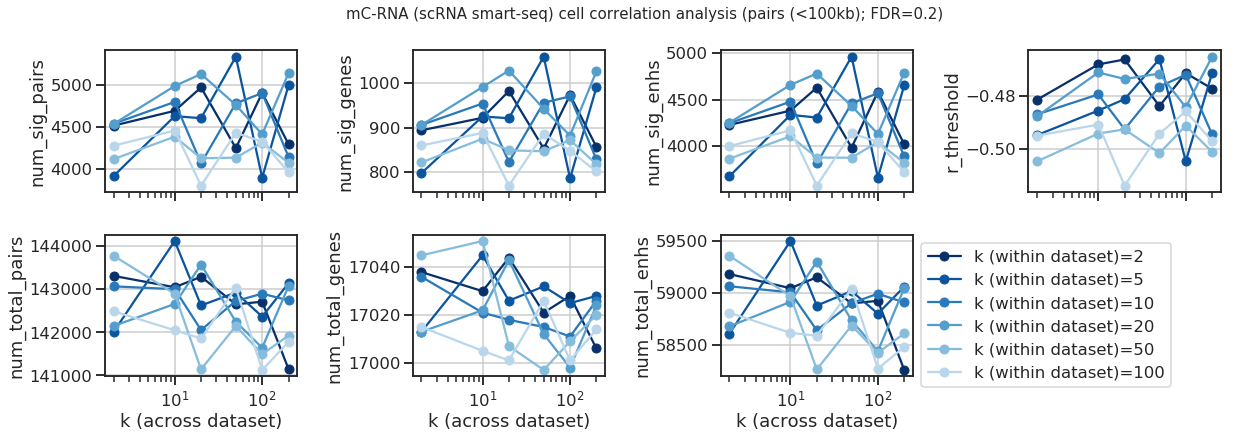

In [218]:
# plot (x - across)
fig, axs = plt.subplots(2, 4, figsize=(5*4, 3*2), sharex=True)
fig.suptitle('mC-RNA (scRNA smart-seq) cell correlation analysis ({}; FDR={})'.format(label, fdr_threshold), 
             fontsize=15)

axs = axs.flatten()
ka_colors = snmcseq_utils.get_grad_colors(len(res['ka'].unique())+2, cmap='Blues_r')
for i_ax, (ax, col) in enumerate(zip(axs, res.columns[2:])):
    for i, (ka, _table) in enumerate(res.groupby('ka')):
        _table = _table.sort_values('k')
        ax.plot(_table['k'], _table[col], '-o', 
                color=ka_colors[i], 
                label='k (within dataset)={}'.format(ka))

    ax.set_xscale('log')
    ax.set_ylabel(col)
    
    if i_ax >= 4:
        ax.set_xlabel('k (across dataset)')
    if i_ax == 6: 
        ax.legend(bbox_to_anchor=(1,1), loc='upper left')
        
axs[-1].axis('off') 
fig.subplots_adjust(wspace=0.6, hspace=0.3)
snmcseq_utils.savefig(fig, output_figure1)
plt.show()

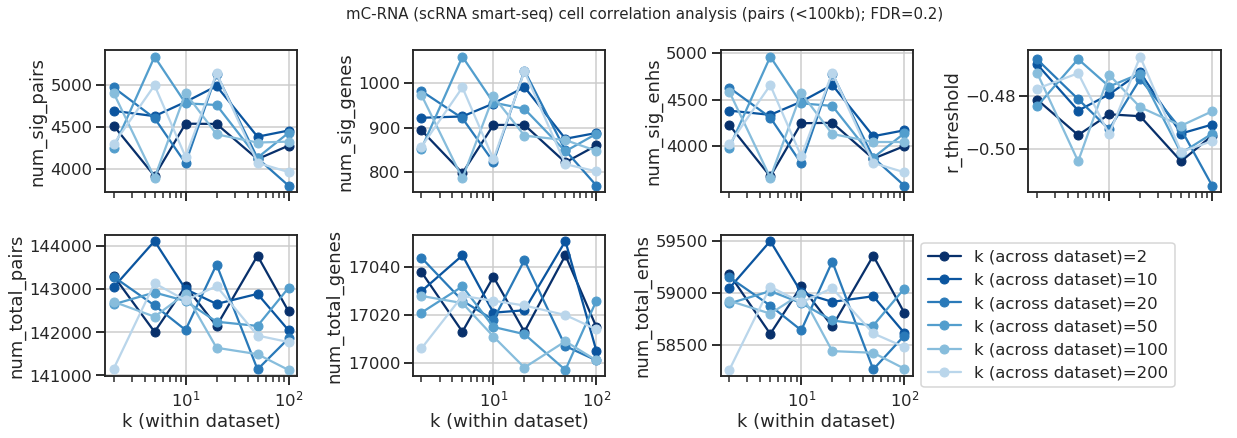

In [219]:
# plot (x - within)

fig, axs = plt.subplots(2, 4, figsize=(5*4, 3*2), sharex=True)
fig.suptitle('mC-RNA (scRNA smart-seq) cell correlation analysis ({}; FDR={})'.format(label, fdr_threshold), 
             fontsize=15)

axs = axs.flatten()
k_colors = snmcseq_utils.get_grad_colors(len(res['ka'].unique())+2, cmap='Blues_r')
for i_ax, (ax, col) in enumerate(zip(axs, res.columns[2:])):
    for i, (k, _table) in enumerate(res.groupby('k')):
        _table = _table.sort_values('ka')
        ax.plot(_table['ka'], _table[col], '-o', 
                color=k_colors[i], 
                label='k (across dataset)={}'.format(k))

    ax.set_xscale('log')
    ax.set_ylabel(col)
    
    if i_ax >= 4:
        ax.set_xlabel('k (within dataset)')
    if i_ax == 6: 
        ax.legend(bbox_to_anchor=(1,1), loc='upper left')
        
axs[-1].axis('off') 
fig.subplots_adjust(wspace=0.6, hspace=0.3)
snmcseq_utils.savefig(fig, output_figure2)
plt.show()

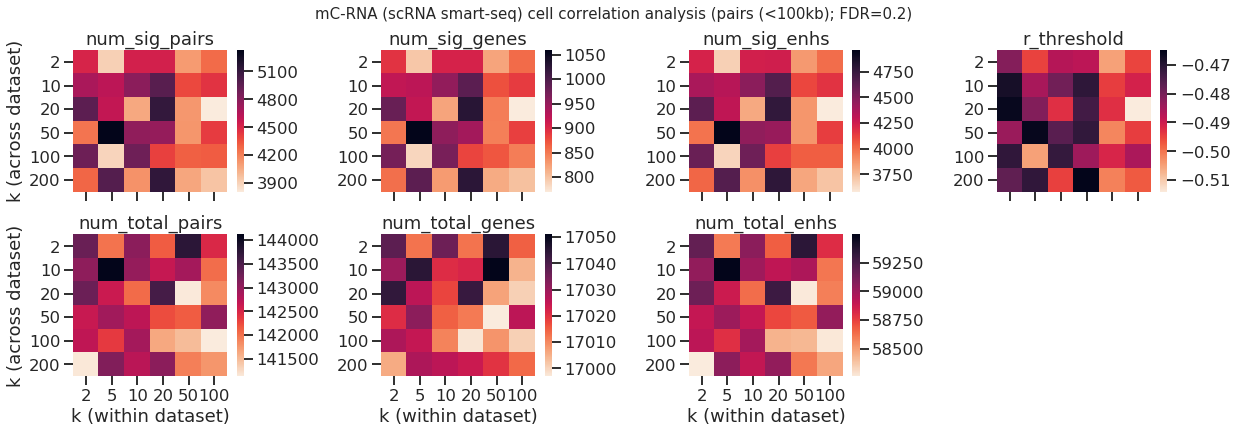

In [221]:
res_pivot = pd.pivot(res, index='k', columns='ka')

# plot same ks
fig, axs = plt.subplots(2, 4, figsize=(5*4, 3*2), sharex=True)
fig.suptitle('mC-RNA (scRNA smart-seq) cell correlation analysis ({}; FDR={})'.format(label, fdr_threshold), 
             fontsize=15)

axs = axs.flatten()
k_colors = snmcseq_utils.get_grad_colors(len(res['ka'].unique())+2, cmap='Blues_r')
_table = res[res['ka']==res['k']]
_table = _table.sort_values('ka')
for i_ax, (ax, col) in enumerate(zip(axs, res.columns[2:])):
    sns.heatmap(res_pivot[col], cmap='rocket_r', ax=ax)

    ax.set_title(col)
    
    if i_ax in (0, 4):
        ax.set_ylabel('k (across dataset)')
    else:
        ax.set_ylabel('')
        
    if i_ax >= 4:
        ax.set_xlabel('k (within dataset)')
    else:
        ax.set_xlabel('')
        
        
axs[-1].axis('off') 
fig.subplots_adjust(wspace=0.6, hspace=0.3)
snmcseq_utils.savefig(fig, output_figure4)
plt.show()

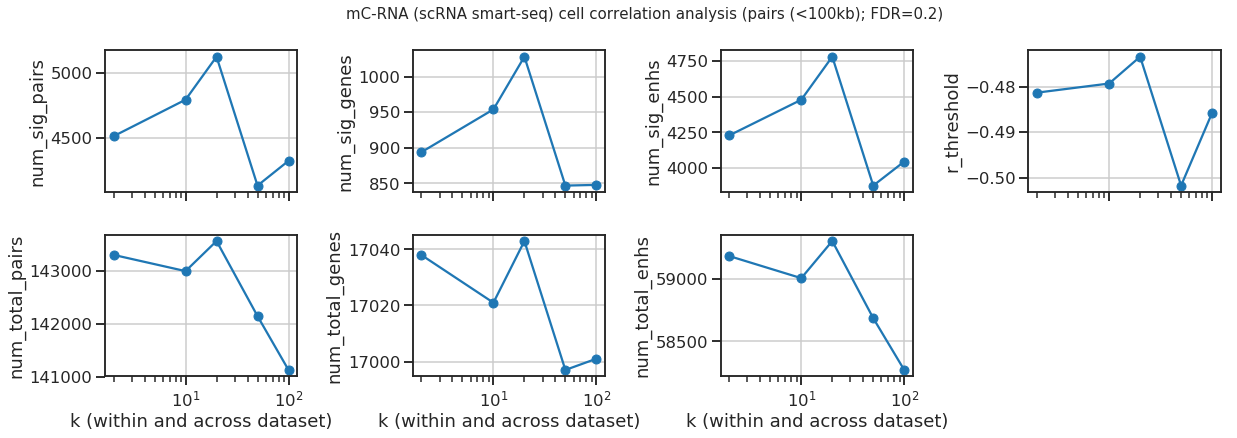

In [220]:
# plot same ks

fig, axs = plt.subplots(2, 4, figsize=(5*4, 3*2), sharex=True)
fig.suptitle('mC-RNA (scRNA smart-seq) cell correlation analysis ({}; FDR={})'.format(label, fdr_threshold), 
             fontsize=15)

axs = axs.flatten()
k_colors = snmcseq_utils.get_grad_colors(len(res['ka'].unique())+2, cmap='Blues_r')
_table = res[res['ka']==res['k']]
_table = _table.sort_values('ka')
for i_ax, (ax, col) in enumerate(zip(axs, res.columns[2:])):
    ax.plot(_table['ka'], _table[col], '-o', 
           )

    ax.set_xscale('log')
    ax.set_ylabel(col)
    
    if i_ax >= 4:
        ax.set_xlabel('k (within and across dataset)')
        
axs[-1].axis('off') 
fig.subplots_adjust(wspace=0.6, hspace=0.3)
snmcseq_utils.savefig(fig, output_figure3)
plt.show()

# Plot massive - shuffling cells as the null hypothesis 

In [222]:
import sys
sys.path.insert(0, "/cndd/fangming/CEMBA/snmcseq_dev")

from multiprocessing import Pool,cpu_count
from functools import partial

from scipy import sparse
from scipy import stats
import importlib
from __init__ import *
from __init__jupyterlab import *
import snmcseq_utils
importlib.reload(snmcseq_utils)

import pickle
import datetime
from scipy import optimize

In [223]:
today = datetime.date.today()
print(today)

2020-08-04


In [224]:
input_enh_gene_table = '/cndd2/fangming/projects/scf_enhancers/results/200521_to_evals.tsv' 
output_corr_format = '/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_ka{}_k{}_200803_2020-08-03_corrs.pkl'
output_to_correlate_format = "/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_ka{}_k{}_200803_2020-08-03_corrs_idx.pkl"

output_figure1 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_num_sig_dependency_shuffcell_ka_k_v1.pdf'.format(today)
output_figure2 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_num_sig_dependency_shuffcell_ka_k_v2.pdf'.format(today)
output_figure3 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_num_sig_dependency_shuffcell_ka_k_v3.pdf'.format(today)
output_figure4 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_num_sig_dependency_shuffcell_ka_k_v4.pdf'.format(today)

In [225]:
# enhancer-gene linkage
enhancer_gene_to_eval = pd.read_csv(input_enh_gene_table, sep='\t')
print(enhancer_gene_to_eval.shape)
enhancer_gene_to_eval.head()

(2589994, 18)


,gene,ens,val,val2,val_clustershuffled,val2_clustershuffled,dist,pvalues,fdr<100kb,fdr<200kb,fdr<500kb,fdr<100kb shuffled (cluster label),pvalues2,fdr2<100kb,fdr2<200kb,fdr2<500kb,fdr2<100kb shuffled (cluster label),val_both
0,ENSMUSG00000000001,147520,-0.157895,0.127913,-0.169712,-0.049349,995118,0.288079,0.674683,0.736811,0.827139,1.647931,0.383141,0.745977,0.797076,0.872822,1.955898,-0.285808
1,ENSMUSG00000000001,147522,0.027465,-0.307145,0.064887,0.105591,985740,0.561881,0.830849,0.867082,0.917381,0.958300,0.935264,0.973809,0.979844,0.987476,0.959470,0.334610
2,ENSMUSG00000000001,147523,-0.040376,0.011489,-0.155487,0.014772,983725,0.457686,0.780196,0.825259,0.889141,1.089312,0.580703,0.841673,0.874844,0.922832,1.273339,-0.051866
3,ENSMUSG00000000001,147527,-0.070795,0.111719,-0.088084,0.184594,970444,0.411564,0.755088,0.804341,0.874375,1.183332,0.410358,0.761056,0.809464,0.880982,1.812516,-0.182514
4,ENSMUSG00000000001,147528,0.012583,0.150673,-0.036218,0.147609,969372,0.539123,0.819981,0.858026,0.911467,0.979843,0.345993,0.725803,0.780447,0.862033,2.191506,-0.138090


In [226]:
# 

ka_list = [2, 5, 10, 20, 50, 100, 200] 
k_list = [2, 50, 10, 20, 50, 100, 200]

num_bins = 200
bins = np.linspace(-1, 0.3, num_bins)
fdr_threshold = 0.2
label = 'pairs (<100kb)'


res = []

for ka in ka_list:
    for k in k_list:
        # 
        output_corr = output_corr_format.format(ka, k)
        output_to_correlate = output_to_correlate_format.format(ka, k)
        
        # try loading the list
        try:
            with open(output_corr, 'rb') as fh:
                corrs, corrs_shuffled, corrs_shuffled_cells = pickle.load(fh)
            print(corrs.shape, corrs_shuffled.shape, corrs_shuffled_cells.shape)

            with open(output_to_correlate, 'rb') as fh:
                to_correlate = pickle.load(fh)
            print(to_correlate.shape)
        except:
            continue
        
        # dists 
        dists = enhancer_gene_to_eval.loc[to_correlate, 'dist'].values
        
#         # total numbers
#         num_total_pairs = len(enhancer_gene_to_eval[to_correlate])
#         num_total_genes = len(enhancer_gene_to_eval[to_correlate]['gene'].unique())
#         num_total_enhs = len(enhancer_gene_to_eval[to_correlate]['ens'].unique())
        
        ## sig numbers
        label_cond = dists < 1e5
        track = corrs[label_cond]
        
        ### total numbers with the condition
        num_total_pairs = len(enhancer_gene_to_eval[to_correlate][label_cond])
        num_total_genes = len(enhancer_gene_to_eval[to_correlate][label_cond]['gene'].unique())
        num_total_enhs = len(enhancer_gene_to_eval[to_correlate][label_cond]['ens'].unique())

        hist_shuff, _ = np.histogram(corrs_shuffled_cells, bins=bins, normed=True)
        cdf_shuff = np.cumsum(hist_shuff)
        # dist
        hist, _ = np.histogram(track, bins=bins, normed=True)
        cdf = np.cumsum(hist)
        # fdr
        fdr = cdf_shuff/cdf

        # get r_threshold
        # remove nan
        isnan = np.isnan(fdr)
        _y = fdr[~isnan]
        _x = bins[1:][~isnan]
        # find r threshold
        try:
            f = lambda _x_func: np.interp(_x_func, _x, _y) - fdr_threshold
            r_threshold = optimize.root_scalar(f, bracket=(-1, 0)).root
        except:
            r_threshold = 0

        sig_table = enhancer_gene_to_eval[to_correlate][label_cond][track<r_threshold]

        # num_sig
        num_sig_pairs = len(sig_table)
        num_sig_genes = len(sig_table['gene'].unique()) 
        num_sig_enhs = len(sig_table['ens'].unique()) 

        # record
        res.append({
            'ka': ka,
            'k': k,
            'num_total_pairs': num_total_pairs,
            'num_total_genes': num_total_genes,
            'num_total_enhs': num_total_enhs,
            'num_sig_pairs': num_sig_pairs,
            'num_sig_genes': num_sig_genes,
            'num_sig_enhs': num_sig_enhs,
            'r_threshold': r_threshold,
        })
        
res = pd.DataFrame(res)[[
            'ka',
            'k',
            'num_sig_pairs',
            'num_sig_genes',
            'num_sig_enhs',
            'r_threshold',
            'num_total_pairs',
            'num_total_genes',
            'num_total_enhs',
]] 
print(res.shape)
res.head()

(1546436,) (1546436,) (1546436,)
(2589994,)


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


(1539635,) (1539635,) (1539635,)
(2589994,)
(1543164,) (1543164,) (1543164,)
(2589994,)
(1546273,) (1546273,) (1546273,)
(2589994,)
(1539635,) (1539635,) (1539635,)
(2589994,)
(1539798,) (1539798,) (1539798,)
(2589994,)
(1522985,) (1522985,) (1522985,)
(2589994,)
(1532335,) (1532335,) (1532335,)
(2589994,)
(1542719,) (1542719,) (1542719,)
(2589994,)
(1555150,) (1555150,) (1555150,)
(2589994,)
(1538700,) (1538700,) (1538700,)
(2589994,)
(1542719,) (1542719,) (1542719,)
(2589994,)
(1536987,) (1536987,) (1536987,)
(2589994,)
(1543970,) (1543970,) (1543970,)
(2589994,)
(1543906,) (1543906,) (1543906,)
(2589994,)
(1539561,) (1539561,) (1539561,)
(2589994,)
(1542335,) (1542335,) (1542335,)
(2589994,)
(1533257,) (1533257,) (1533257,)
(2589994,)
(1539561,) (1539561,) (1539561,)
(2589994,)
(1541895,) (1541895,) (1541895,)
(2589994,)
(1539550,) (1539550,) (1539550,)
(2589994,)
(1534403,) (1534403,) (1534403,)
(2589994,)
(1535991,) (1535991,) (1535991,)
(2589994,)
(1539372,) (1539372,) (1539372,)

,ka,k,num_sig_pairs,num_sig_genes,num_sig_enhs,r_threshold,num_total_pairs,num_total_genes,num_total_enhs
0,2,2,91178,15426,47683,-0.013453,143311,17038,59180
1,2,50,90477,15353,47442,-0.013307,142651,17021,58898
2,2,10,89396,15284,47008,-0.014860,143047,17030,59044
3,2,20,89811,15300,47271,-0.015227,143291,17044,59149
4,2,50,90477,15353,47442,-0.013307,142651,17021,58898


In [227]:
res = res.groupby(['ka', 'k']).first().reset_index()
res.shape

(36, 9)

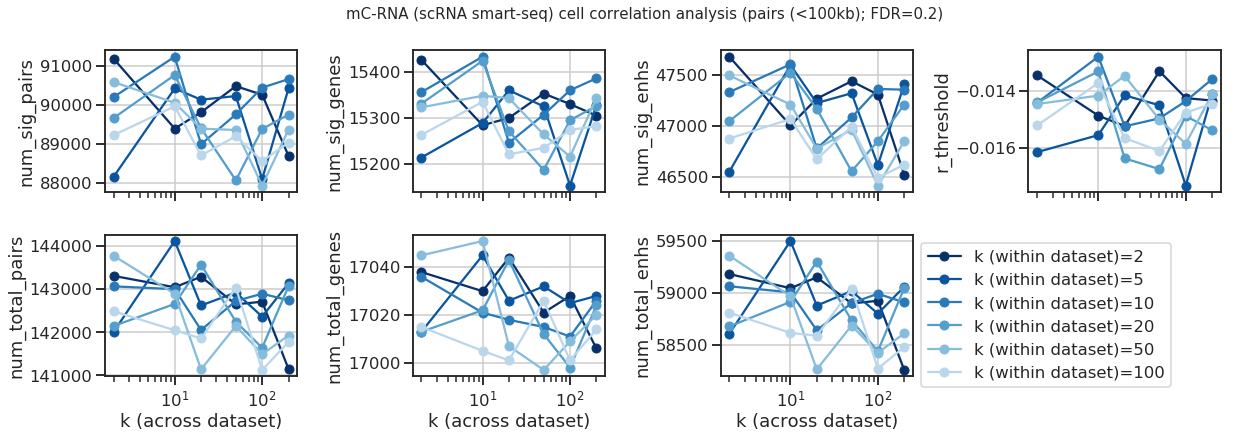

In [228]:
# plot (x - across)
fig, axs = plt.subplots(2, 4, figsize=(5*4, 3*2), sharex=True)
fig.suptitle('mC-RNA (scRNA smart-seq) cell correlation analysis ({}; FDR={})'.format(label, fdr_threshold), 
             fontsize=15)

axs = axs.flatten()
ka_colors = snmcseq_utils.get_grad_colors(len(res['ka'].unique())+2, cmap='Blues_r')
for i_ax, (ax, col) in enumerate(zip(axs, res.columns[2:])):
    for i, (ka, _table) in enumerate(res.groupby('ka')):
        _table = _table.sort_values('k')
        ax.plot(_table['k'], _table[col], '-o', 
                color=ka_colors[i], 
                label='k (within dataset)={}'.format(ka))

    ax.set_xscale('log')
    ax.set_ylabel(col)
    
    if i_ax >= 4:
        ax.set_xlabel('k (across dataset)')
    if i_ax == 6: 
        ax.legend(bbox_to_anchor=(1,1), loc='upper left')
        
axs[-1].axis('off') 
fig.subplots_adjust(wspace=0.6, hspace=0.3)
snmcseq_utils.savefig(fig, output_figure1)
plt.show()

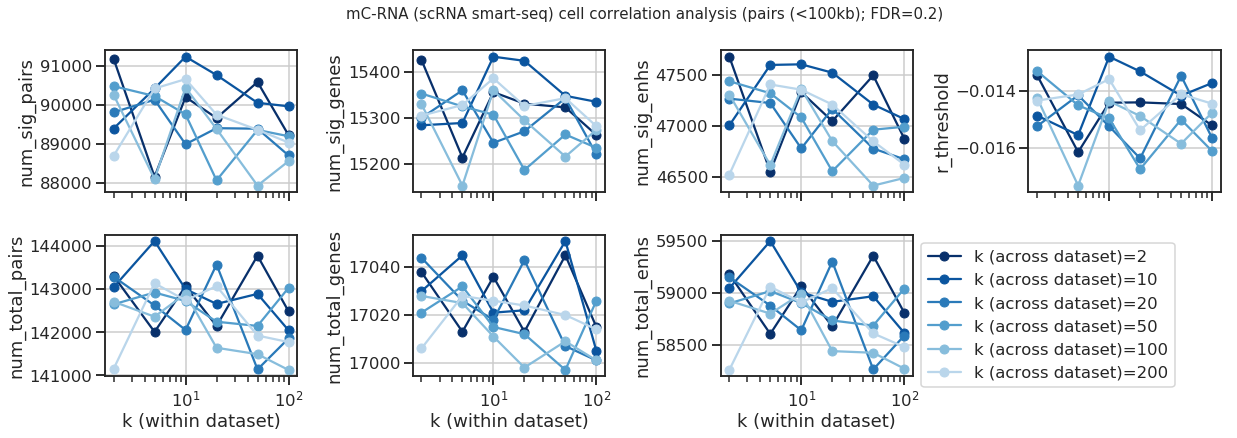

In [229]:
# plot (x - within)

fig, axs = plt.subplots(2, 4, figsize=(5*4, 3*2), sharex=True)
fig.suptitle('mC-RNA (scRNA smart-seq) cell correlation analysis ({}; FDR={})'.format(label, fdr_threshold), 
             fontsize=15)

axs = axs.flatten()
k_colors = snmcseq_utils.get_grad_colors(len(res['ka'].unique())+2, cmap='Blues_r')
for i_ax, (ax, col) in enumerate(zip(axs, res.columns[2:])):
    for i, (k, _table) in enumerate(res.groupby('k')):
        _table = _table.sort_values('ka')
        ax.plot(_table['ka'], _table[col], '-o', 
                color=k_colors[i], 
                label='k (across dataset)={}'.format(k))

    ax.set_xscale('log')
    ax.set_ylabel(col)
    
    if i_ax >= 4:
        ax.set_xlabel('k (within dataset)')
    if i_ax == 6: 
        ax.legend(bbox_to_anchor=(1,1), loc='upper left')
        
axs[-1].axis('off') 
fig.subplots_adjust(wspace=0.6, hspace=0.3)
snmcseq_utils.savefig(fig, output_figure2)
plt.show()

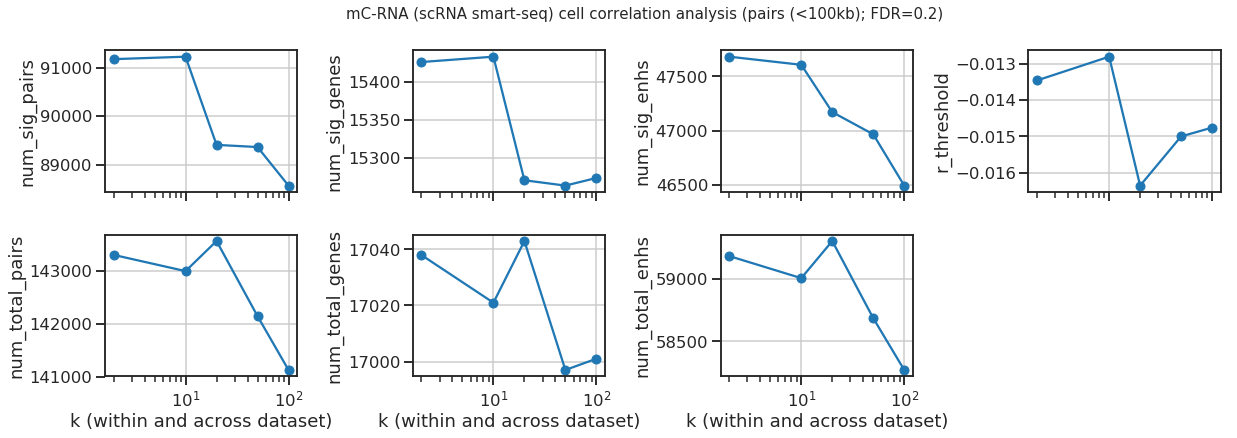

In [230]:
# plot same ks

fig, axs = plt.subplots(2, 4, figsize=(5*4, 3*2), sharex=True)
fig.suptitle('mC-RNA (scRNA smart-seq) cell correlation analysis ({}; FDR={})'.format(label, fdr_threshold), 
             fontsize=15)

axs = axs.flatten()
k_colors = snmcseq_utils.get_grad_colors(len(res['ka'].unique())+2, cmap='Blues_r')
_table = res[res['ka']==res['k']]
_table = _table.sort_values('ka')
for i_ax, (ax, col) in enumerate(zip(axs, res.columns[2:])):
    ax.plot(_table['ka'], _table[col], '-o', 
           )

    ax.set_xscale('log')
    ax.set_ylabel(col)
    
    if i_ax >= 4:
        ax.set_xlabel('k (within and across dataset)')
        
axs[-1].axis('off') 
fig.subplots_adjust(wspace=0.6, hspace=0.3)
snmcseq_utils.savefig(fig, output_figure3)
plt.show()

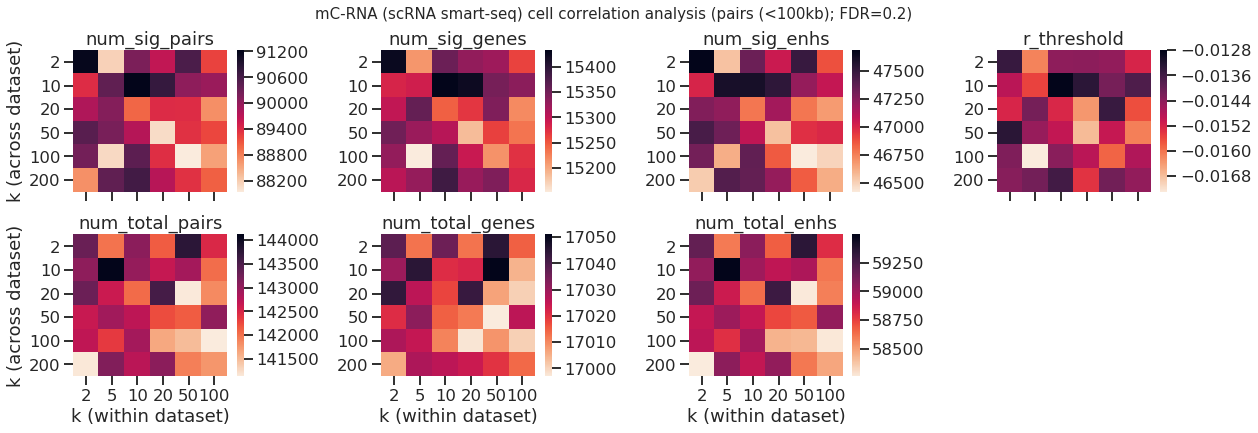

In [231]:
res_pivot = pd.pivot(res, index='k', columns='ka')

# plot same ks
fig, axs = plt.subplots(2, 4, figsize=(5*4, 3*2), sharex=True)
fig.suptitle('mC-RNA (scRNA smart-seq) cell correlation analysis ({}; FDR={})'.format(label, fdr_threshold), 
             fontsize=15)

axs = axs.flatten()
k_colors = snmcseq_utils.get_grad_colors(len(res['ka'].unique())+2, cmap='Blues_r')
_table = res[res['ka']==res['k']]
_table = _table.sort_values('ka')
for i_ax, (ax, col) in enumerate(zip(axs, res.columns[2:])):
    sns.heatmap(res_pivot[col], cmap='rocket_r', ax=ax)

    ax.set_title(col)
    
    if i_ax in (0, 4):
        ax.set_ylabel('k (across dataset)')
    else:
        ax.set_ylabel('')
        
    if i_ax >= 4:
        ax.set_xlabel('k (within dataset)')
    else:
        ax.set_xlabel('')
        
        
axs[-1].axis('off') 
fig.subplots_adjust(wspace=0.6, hspace=0.3)
snmcseq_utils.savefig(fig, output_figure4)
plt.show()

# Plot massive (2nd iteration) 

In [316]:
import sys
sys.path.insert(0, "/cndd/fangming/CEMBA/snmcseq_dev")

from multiprocessing import Pool,cpu_count
from functools import partial

from scipy import sparse
from scipy import stats
import importlib
from __init__ import *
from __init__jupyterlab import *
import snmcseq_utils
importlib.reload(snmcseq_utils)

import pickle
import datetime
from scipy import optimize

In [317]:
today = datetime.date.today()
print(today)

2020-08-07


In [318]:
input_enh_gene_table = '/cndd2/fangming/projects/scf_enhancers/results/200521_to_evals.tsv' 
output_corr_format = '/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_ka{}_k{}_200803_2020-08-03_corrs.pkl'
output_to_correlate_format = "/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_ka{}_k{}_200803_2020-08-03_corrs_idx.pkl"

output_figure1 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_num_sig_dependency_k_only_v1.pdf'.format(today)
output_figure2 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_num_sig_dependency_k_only_v2.pdf'.format(today)
output_figure3 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_num_sig_dependency_k_only_v3.pdf'.format(today)
output_figure4 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_num_sig_dependency_k_only_v4.pdf'.format(today)

In [319]:
f_pattern = "/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_*corrs.pkl"
fnames = glob.glob(f_pattern)
iterator = [(int(re.findall("_k[0-9]+", fname)[0][len("_k"):]), 
             int(re.findall("_ka[0-9]+", fname)[0][len("_ka"):]), 
             fname, fname.replace('corrs.pkl', 'corrs_idx.pkl'),
            ) for fname in fnames]
res = []
for k, ka, output_corr, output_to_correlate in iterator:
    print(k, ka)
        # 
#     output_corr = output_corr_format.format(ka, k)
#     output_to_correlate = output_to_correlate_format.format(ka, k)
    
    # try loading the list
    try:
        with open(output_corr, 'rb') as fh:
            corrs, corrs_shuffled, corrs_shuffled_cells = pickle.load(fh)
        print(corrs.shape, corrs_shuffled.shape, corrs_shuffled_cells.shape)

        with open(output_to_correlate, 'rb') as fh:
            to_correlate = pickle.load(fh)
        print(to_correlate.shape)
    except:
        continue
    
    # dists 
    dists = enhancer_gene_to_eval.loc[to_correlate, 'dist'].values
    
    # ## total numbers
    # num_total_pairs = len(enhancer_gene_to_eval[to_correlate])
    # num_total_genes = len(enhancer_gene_to_eval[to_correlate]['gene'].unique())
    # num_total_enhs = len(enhancer_gene_to_eval[to_correlate]['ens'].unique())
    
    
    ## sig numbers
    label_cond = dists < 1e5
    track = corrs[label_cond]
    
    ### total numbers with the condition
    num_total_pairs = len(enhancer_gene_to_eval[to_correlate][label_cond])
    num_total_genes = len(enhancer_gene_to_eval[to_correlate][label_cond]['gene'].unique())
    num_total_enhs = len(enhancer_gene_to_eval[to_correlate][label_cond]['ens'].unique())

    hist_shuff, _ = np.histogram(corrs_shuffled, bins=bins, normed=True)
    cdf_shuff = np.cumsum(hist_shuff)
    # dist
    hist, _ = np.histogram(track, bins=bins, normed=True)
    cdf = np.cumsum(hist)
    # fdr
    fdr = cdf_shuff/cdf

    # get r_threshold
    # remove nan
    isnan = np.isnan(fdr)
    _y = fdr[~isnan]
    _x = bins[1:][~isnan]
    # find r threshold
    try:
        f = lambda _x_func: np.interp(_x_func, _x, _y) - fdr_threshold
        r_threshold = optimize.root_scalar(f, bracket=(-1, 0)).root
    except:
        r_threshold = 0

    sig_table = enhancer_gene_to_eval[to_correlate][label_cond][track<r_threshold]

    # num_sig
    num_sig_pairs = len(sig_table)
    num_sig_genes = len(sig_table['gene'].unique()) 
    num_sig_enhs = len(sig_table['ens'].unique()) 

    # record
    res.append({
        'ka': ka,
        'k': k,
        'num_total_pairs': num_total_pairs,
        'num_total_genes': num_total_genes,
        'num_total_enhs': num_total_enhs,
        'num_sig_pairs': num_sig_pairs,
        'num_sig_genes': num_sig_genes,
        'num_sig_enhs': num_sig_enhs,
        'r_threshold': r_threshold,
    })
    
res = pd.DataFrame(res)[[
            'ka',
            'k',
            'num_sig_pairs',
            'num_sig_genes',
            'num_sig_enhs',
            'r_threshold',
            'num_total_pairs',
            'num_total_genes',
            'num_total_enhs',
]] 
print(res.shape)
res.head()

5 10
(1543792,) (1543792,) (1543792,)
(2589994,)


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


5 100
(1535593,) (1535593,) (1535593,)
(2589994,)
9 9
(1516127,) (1516127,) (1516127,)
(2589994,)
200 200
(1531229,) (1531229,) (1531229,)
(2589994,)
5 5
(1548445,) (1548445,) (1548445,)
(2589994,)
20 20
(1549514,) (1549514,) (1549514,)
(2589994,)
100 2
(1539798,) (1539798,) (1539798,)
(2589994,)
50 5
(1542719,) (1542719,) (1542719,)
(2589994,)
5 20
(1541216,) (1541216,) (1541216,)
(2589994,)
40 40
(1536107,) (1536107,) (1536107,)
(2589994,)
100 50
(1527455,) (1527455,) (1527455,)
(2589994,)
50 200
(1522736,) (1522736,) (1522736,)
(2589994,)
15 15
(1533125,) (1533125,) (1533125,)
(2589994,)
75 75
(1544159,) (1544159,) (1544159,)
(2589994,)
500 500
(1519964,) (1519964,) (1519964,)
(2589994,)
50 2
(1539635,) (1539635,) (1539635,)
(2589994,)
6 6
(1533823,) (1533823,) (1533823,)
(2589994,)
2 200
(1531908,) (1531908,) (1531908,)
(2589994,)
50 50
(1533816,) (1533816,) (1533816,)
(2589994,)
200 5
(1543970,) (1543970,) (1543970,)
(2589994,)
200 100
(1529874,) (1529874,) (1529874,)
(2589994,)
1

,ka,k,num_sig_pairs,num_sig_genes,num_sig_enhs,r_threshold,num_total_pairs,num_total_genes,num_total_enhs
0,10,5,4675,931,4379,-0.484508,143012,17030,59048
1,100,5,4269,860,3998,-0.496061,142296,17011,58741
2,9,9,4747,951,4431,-0.443487,140444,16974,57985
3,200,200,3955,796,3709,-0.506771,141820,17005,58579
4,5,5,4907,984,4592,-0.478147,143484,17028,59217


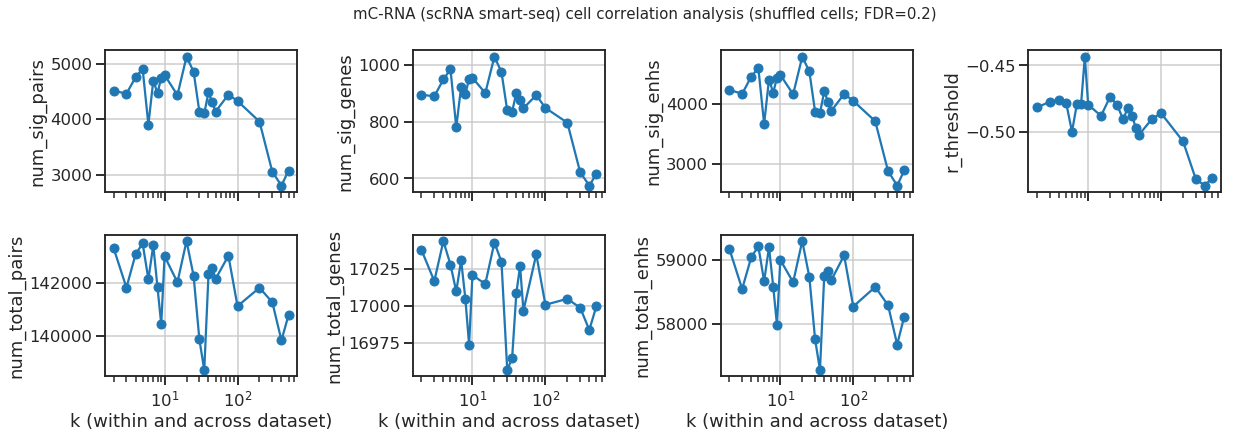

In [320]:
# plot same ks

fig, axs = plt.subplots(2, 4, figsize=(5*4, 3*2), sharex=True)
fig.suptitle('mC-RNA (scRNA smart-seq) cell correlation analysis ({}; FDR={})'.format(label, fdr_threshold), 
             fontsize=15)

axs = axs.flatten()
k_colors = snmcseq_utils.get_grad_colors(len(res['ka'].unique())+2, cmap='Blues_r')
_table = res[res['ka']==res['k']]
_table = _table.sort_values('ka')
for i_ax, (ax, col) in enumerate(zip(axs, res.columns[2:])):
    ax.plot(_table['ka'], _table[col], '-o', 
           )

    ax.set_xscale('log')
    ax.set_ylabel(col)
    
    if i_ax >= 4:
        ax.set_xlabel('k (within and across dataset)')
        
axs[-1].axis('off') 
fig.subplots_adjust(wspace=0.6, hspace=0.3)
snmcseq_utils.savefig(fig, output_figure3)
plt.show()

In [321]:
_table.sort_values('ka')

,ka,k,num_sig_pairs,num_sig_genes,num_sig_enhs,r_threshold,num_total_pairs,num_total_genes,num_total_enhs
22,2,2,4514,894,4229,-0.481292,143311,17038,59180
63,3,3,4455,889,4163,-0.477120,141824,17017,58547
34,4,4,4753,948,4450,-0.475476,143071,17044,59047
4,5,5,4907,984,4592,-0.478147,143484,17028,59217
16,6,6,3899,780,3665,-0.499586,142140,17010,58668
57,7,7,4693,923,4400,-0.479043,143416,17031,59203
39,8,8,4465,896,4182,-0.478928,141833,17005,58584
2,9,9,4747,951,4431,-0.443487,140444,16974,57985
56,10,10,4794,954,4478,-0.479290,143003,17021,59004
12,15,15,4431,900,4155,-0.487710,142024,17015,58654


# Plot massive (3nd iteration - subsampling) 

In [1]:
import sys
sys.path.insert(0, "/cndd/fangming/CEMBA/snmcseq_dev")

from multiprocessing import Pool,cpu_count
from functools import partial

from scipy import sparse
from scipy import stats
import importlib
from __init__ import *
from __init__jupyterlab import *
import snmcseq_utils
importlib.reload(snmcseq_utils)

import re
import pickle
import datetime
from scipy import optimize

In [2]:
today = datetime.date.today()
print(today)

2020-08-17


In [47]:
input_enh_gene_table = '/cndd2/fangming/projects/scf_enhancers/results/200521_to_evals.tsv' 

output_figure1 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_num_sig_dependency_k_only_v1.pdf'.format(today)
output_figure2 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_num_sig_dependency_k_only_v2.pdf'.format(today)
output_figure3 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_num_sig_dependency_k_only_v3.pdf'.format(today)
output_figure4 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_num_sig_dependency_k_only_v4.pdf'.format(today)

In [48]:
# enhancer-gene linkage
ti = time.time()
enhancer_gene_to_eval = pd.read_csv(input_enh_gene_table, sep='\t')

print(enhancer_gene_to_eval.shape)
print(time.time()-ti)
enhancer_gene_to_eval.head()

(2589994, 18)
6.079247951507568


,gene,ens,val,val2,val_clustershuffled,val2_clustershuffled,dist,pvalues,fdr<100kb,fdr<200kb,fdr<500kb,fdr<100kb shuffled (cluster label),pvalues2,fdr2<100kb,fdr2<200kb,fdr2<500kb,fdr2<100kb shuffled (cluster label),val_both
0,ENSMUSG00000000001,147520,-0.157895,0.127913,-0.169712,-0.049349,995118,0.288079,0.674683,0.736811,0.827139,1.647931,0.383141,0.745977,0.797076,0.872822,1.955898,-0.285808
1,ENSMUSG00000000001,147522,0.027465,-0.307145,0.064887,0.105591,985740,0.561881,0.830849,0.867082,0.917381,0.958300,0.935264,0.973809,0.979844,0.987476,0.959470,0.334610
2,ENSMUSG00000000001,147523,-0.040376,0.011489,-0.155487,0.014772,983725,0.457686,0.780196,0.825259,0.889141,1.089312,0.580703,0.841673,0.874844,0.922832,1.273339,-0.051866
3,ENSMUSG00000000001,147527,-0.070795,0.111719,-0.088084,0.184594,970444,0.411564,0.755088,0.804341,0.874375,1.183332,0.410358,0.761056,0.809464,0.880982,1.812516,-0.182514
4,ENSMUSG00000000001,147528,0.012583,0.150673,-0.036218,0.147609,969372,0.539123,0.819981,0.858026,0.911467,0.979843,0.345993,0.725803,0.780447,0.862033,2.191506,-0.138090


In [49]:
num_bins = 200
bins = np.linspace(-1, 0.3, num_bins)
fdr_threshold = 0.2
distance_threshold = 1e5

label = 'pairs (<100kb)'

In [50]:
f_pattern = ("/cndd2/fangming/projects/scf_enhancers/results/"
             "corr_analysis_smarter_cells_snmcseq_gene_ka[0-9]*_knn[0-9]*_*_[0-9]_corrs.pkl"
            )

fnames = glob.glob(f_pattern)
iterator = [(int(re.findall("_knn[0-9]+", fname)[0][len("_knn"):]), 
             int(re.findall("_ka[0-9]+", fname)[0][len("_ka"):]), 
             int(re.findall("[0-9]+_corrs.pkl", fname)[0][:-len("_corrs.pkl")]), 
             fname, fname.replace('corrs', 'corrs_idx'),
            ) for fname in fnames]
fnames[:5]

['/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_ka50_knn50_200807_2020-08-13_5_corrs.pkl',
 '/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_ka5_knn5_200807_2020-08-12_6_corrs.pkl',
 '/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_ka50_knn50_200807_2020-08-13_4_corrs.pkl',
 '/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_ka5_knn5_200807_2020-08-12_7_corrs.pkl',
 '/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_ka5_knn5_200807_2020-08-12_4_corrs.pkl']

In [51]:
res = []
for k, ka, i_sub, output_corr, output_to_correlate in iterator:
    print(k, ka)
    
    # try loading the list
    try:
        with open(output_corr, 'rb') as fh:
            corrs, corrs_shuffled, corrs_shuffled_cells = pickle.load(fh)
        print(corrs.shape, corrs_shuffled.shape, corrs_shuffled_cells.shape)

        with open(output_to_correlate, 'rb') as fh:
            to_correlate = pickle.load(fh)
        print(to_correlate.shape)
    except:
        continue
    
    # dists 
    dists = enhancer_gene_to_eval.loc[to_correlate, 'dist'].values
#     print(dists.shape, corrs.shape, corrs[:5])
    
    ## sig numbers
    label_cond = dists < distance_threshold
    track = corrs[label_cond]
    
    ### total numbers with the condition
    num_total_pairs = len(enhancer_gene_to_eval[to_correlate][label_cond])
    num_total_genes = len(enhancer_gene_to_eval[to_correlate][label_cond]['gene'].unique())
    num_total_enhs = len(enhancer_gene_to_eval[to_correlate][label_cond]['ens'].unique())

    hist_shuff, _ = np.histogram(corrs_shuffled, bins=bins, density=True)
    cdf_shuff = np.cumsum(hist_shuff)
    # dist
    hist, _ = np.histogram(track, bins=bins, density=True)
    cdf = np.cumsum(hist)
    # fdr
    fdr = cdf_shuff/(cdf+1e-7)

    # get r_threshold
    # remove nan
    isnan = np.isnan(fdr)
    _y = fdr[~isnan]
    _x = bins[1:][~isnan]
    
    # find r threshold
    f = lambda _x_func: np.interp(_x_func, _x, _y) - fdr_threshold
    if f(-1)*f(0) < 0:
        sol = optimize.root_scalar(f, bracket=(-1, 0))
        if sol:
            r_threshold = sol.root
        else:
            print("failed to detect r_threshold:", k, ka, i_sub)
            continue # failed
    else:
        print("failed to detect r_threshold:", k, ka, i_sub)
        # r_threshold = 0
        continue # failed

    sig_table = enhancer_gene_to_eval[to_correlate][label_cond][track<r_threshold]

    # num_sig
    num_sig_pairs = len(sig_table)
    num_sig_genes = len(sig_table['gene'].unique()) 
    num_sig_enhs = len(sig_table['ens'].unique()) 

    # record
    res.append({
        'ka': ka,
        'k': k,
        'i_sub': i_sub,
        'num_total_pairs': num_total_pairs,
        'num_total_genes': num_total_genes,
        'num_total_enhs': num_total_enhs,
        'num_sig_pairs': num_sig_pairs,
        'num_sig_genes': num_sig_genes,
        'num_sig_enhs': num_sig_enhs,
        'r_threshold': r_threshold,
    })
    
res = pd.DataFrame(res)[[
            'ka',
            'k',
            'i_sub',
            'num_sig_pairs',
            'num_sig_genes',
            'num_sig_enhs',
            'r_threshold',
            'num_total_pairs',
            'num_total_genes',
            'num_total_enhs',
]] 
print(res.shape)
res.head()

50 50
(2586169,) (2586169,) (2586169,)
(2589994,)
(2586169,) (2586169,) [-0.03325936 -0.11851507 -0.11669369  0.07547802  0.03142555]
5 5
(42832,) (42832,) (42832,)
(2589994,)
(42832,) (42832,) [-0.12838484 -0.05566652  0.035953    0.11517961  0.12590437]
50 50
(2585823,) (2585823,) (2585823,)
(2589994,)
(2585823,) (2585823,) [-0.03093831 -0.13514699 -0.11444506  0.04003306  0.01189578]
5 5
(41086,) (41086,) (41086,)
(2589994,)
(41086,) (41086,) [-0.14052606 -0.07003355  0.06324412  0.1287104   0.11072339]
5 5
(39809,) (39809,) (39809,)
(2589994,)
(39809,) (39809,) [-0.11654477 -0.08387367  0.0651224   0.09506121  0.1257517 ]
50 50
(2585800,) (2585800,) (2585800,)
(2589994,)
(2585800,) (2585800,) [-0.03714088 -0.12448748 -0.13023838  0.08001779  0.05138426]
10 10
(466336,) (466336,) (466336,)
(2589994,)
(466336,) (466336,) [-0.07015783 -0.15100861 -0.02050456 -0.0828219  -0.16867379]
5 5
(41284,) (41284,) (41284,)
(2589994,)
(41284,) (41284,) [-0.14902436 -0.06600846  0.05220964  0.138

,ka,k,i_sub,num_sig_pairs,num_sig_genes,num_sig_enhs,r_threshold,num_total_pairs,num_total_genes,num_total_enhs
0,50,50,5,5844,825,5540,-0.573029,242063,18051,100710
1,5,5,6,444,315,401,-0.301270,3954,2989,1558
2,50,50,4,6025,846,5706,-0.570389,242024,18051,100694
3,5,5,7,461,329,412,-0.293802,3825,2907,1491
4,5,5,4,462,329,412,-0.280116,3672,2805,1433


In [52]:
res_mean = res.groupby(['ka', 'k']).mean().reset_index()
res_std = res.groupby(['ka', 'k']).std().reset_index()

_table = res_mean[res_mean['ka']==res_mean['k']]
_table = _table.sort_values('ka')

_table_std = res_std[res_std['ka']==res_std['k']]
_table_std = _table_std.sort_values('ka')

# res_mean
_table_std.head()

,ka,k,i_sub,num_sig_pairs,num_sig_genes,num_sig_enhs,r_threshold,num_total_pairs,num_total_genes,num_total_enhs
0,2,2,3.02765,1.813529,1.813529,0.788811,0.025156,0.875595,0.875595,0.875595
1,5,5,3.02765,13.560154,9.255029,13.167721,0.016436,232.745951,141.788418,94.233988
2,10,10,3.02765,79.862660,30.433899,71.413973,0.012109,1035.905406,127.023576,421.338990
3,20,20,3.02765,336.993900,58.907083,304.567471,0.009139,1790.015174,29.457314,738.075312
4,50,50,3.02765,486.918245,67.509999,446.930034,0.010984,32.548938,2.624669,12.576875


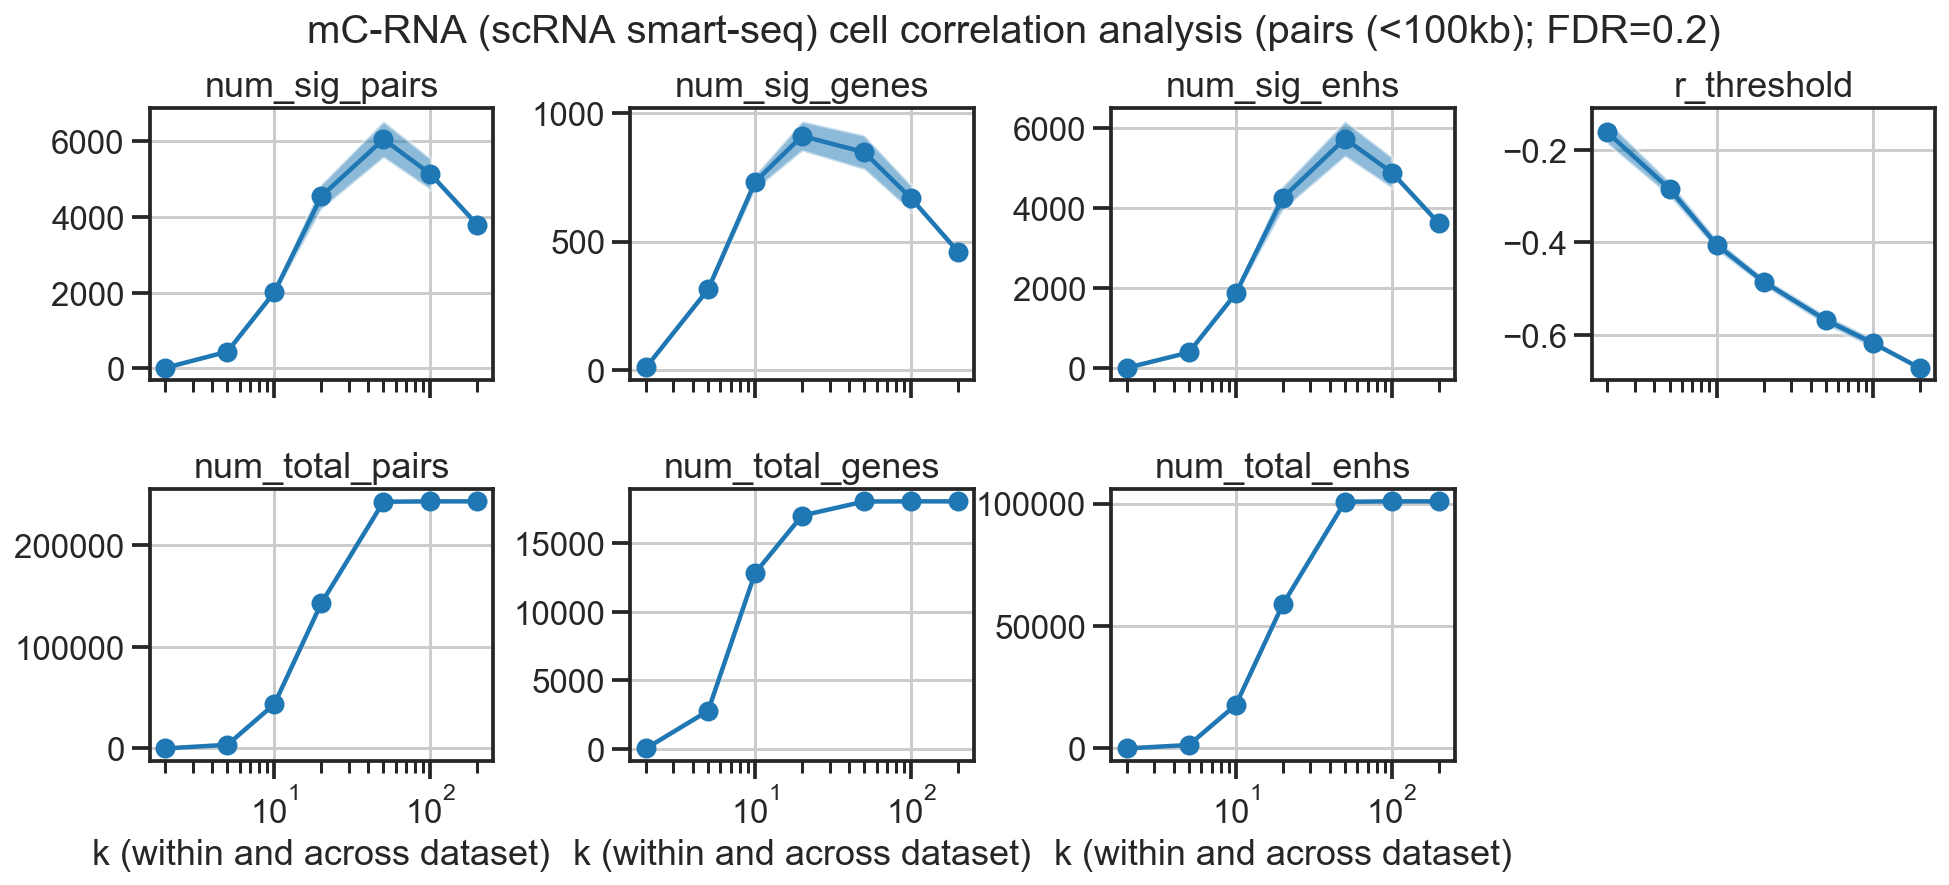

In [53]:
# plot same ks

fig, axs = plt.subplots(2, 4, figsize=(4*4, 3*2), sharex=True)
fig.suptitle('mC-RNA (scRNA smart-seq) cell correlation analysis ({}; FDR={})'.format(label, fdr_threshold), 
             fontsize=20, y=0.99)

axs = axs.flatten()
k_colors = snmcseq_utils.get_grad_colors(len(res_mean['ka'].unique())+2, cmap='Blues_r')
for i_ax, (ax, col) in enumerate(zip(axs, res_mean.columns[3:])):
    _x = _table['ka']
    _y = _table[col]
    _y_std = _table_std[col] 
    ax.plot(_x, _y, '-o')
    ax.fill_between(_x, _y-_y_std, _y+_y_std, alpha=0.5)

    ax.set_xscale('log')
    ax.set_title(col)
    
    if i_ax >= 4:
        ax.set_xlabel('k (within and across dataset)')
        
axs[-1].axis('off') 
fig.subplots_adjust(wspace=0.4, hspace=0.4)
snmcseq_utils.savefig(fig, output_figure3)
plt.show()

# Plot massive (3nd iteration - within mC) 

In [25]:
import sys
sys.path.insert(0, "/cndd/fangming/CEMBA/snmcseq_dev")

from multiprocessing import Pool,cpu_count
from functools import partial

from scipy import sparse
from scipy import stats
import importlib
from __init__ import *
from __init__jupyterlab import *
import snmcseq_utils
importlib.reload(snmcseq_utils)

import re
import pickle
import datetime
from scipy import optimize

In [26]:
today = datetime.date.today()
print(today)

2020-08-13


In [27]:
input_enh_gene_table = '/cndd2/fangming/projects/scf_enhancers/results/200521_to_evals.tsv' 

output_figure1 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_within_mc_num_sig_dependency_k_only_v1.pdf'.format(today)
output_figure2 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_within_mc_num_sig_dependency_k_only_v2.pdf'.format(today)
output_figure3 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_within_mc_num_sig_dependency_k_only_v3.pdf'.format(today)
output_figure4 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_within_mc_num_sig_dependency_k_only_v4.pdf'.format(today)

In [28]:
# enhancer-gene linkage
ti = time.time()
enhancer_gene_to_eval = pd.read_csv(input_enh_gene_table, sep='\t')

print(enhancer_gene_to_eval.shape)
print(time.time()-ti)
enhancer_gene_to_eval.head()

(2589994, 18)
6.691246271133423


,gene,ens,val,val2,val_clustershuffled,val2_clustershuffled,dist,pvalues,fdr<100kb,fdr<200kb,fdr<500kb,fdr<100kb shuffled (cluster label),pvalues2,fdr2<100kb,fdr2<200kb,fdr2<500kb,fdr2<100kb shuffled (cluster label),val_both
0,ENSMUSG00000000001,147520,-0.157895,0.127913,-0.169712,-0.049349,995118,0.288079,0.674683,0.736811,0.827139,1.647931,0.383141,0.745977,0.797076,0.872822,1.955898,-0.285808
1,ENSMUSG00000000001,147522,0.027465,-0.307145,0.064887,0.105591,985740,0.561881,0.830849,0.867082,0.917381,0.958300,0.935264,0.973809,0.979844,0.987476,0.959470,0.334610
2,ENSMUSG00000000001,147523,-0.040376,0.011489,-0.155487,0.014772,983725,0.457686,0.780196,0.825259,0.889141,1.089312,0.580703,0.841673,0.874844,0.922832,1.273339,-0.051866
3,ENSMUSG00000000001,147527,-0.070795,0.111719,-0.088084,0.184594,970444,0.411564,0.755088,0.804341,0.874375,1.183332,0.410358,0.761056,0.809464,0.880982,1.812516,-0.182514
4,ENSMUSG00000000001,147528,0.012583,0.150673,-0.036218,0.147609,969372,0.539123,0.819981,0.858026,0.911467,0.979843,0.345993,0.725803,0.780447,0.862033,2.191506,-0.138090


In [29]:
num_bins = 200
bins = np.linspace(-1, 0.3, num_bins)
fdr_threshold = 0.2
distance_threshold = 1e5
CORR_SIGN = -1

label = 'pairs (<100kb)'

In [33]:
f_pattern = ("/cndd2/fangming/projects/scf_enhancers/results/"
             "corr_analysis_withinmc_ka[0-9]*_knn[0-9]*_*_[0-9]_corrs.pkl"
            )

fnames = glob.glob(f_pattern)
iterator = [(int(re.findall("_knn[0-9]+", fname)[0][len("_knn"):]), 
             int(re.findall("_ka[0-9]+", fname)[0][len("_ka"):]), 
             int(re.findall("[0-9]+_corrs.pkl", fname)[0][:-len("_corrs.pkl")]), 
             fname, fname.replace('corrs', 'corrs_idx'),
            ) for fname in fnames]
fnames[:5]

['/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_withinmc_ka50_knn50_200807_2020-08-13_9_corrs.pkl',
 '/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_withinmc_ka100_knn100_200807_2020-08-13_3_corrs.pkl',
 '/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_withinmc_ka10_knn10_200807_2020-08-12_7_corrs.pkl',
 '/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_withinmc_ka20_knn20_200807_2020-08-13_6_corrs.pkl',
 '/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_withinmc_ka50_knn50_200807_2020-08-13_8_corrs.pkl']

In [34]:
res = []
for k, ka, i_sub, output_corr, output_to_correlate in iterator:
    print(k, ka)
    
    # try loading the list
    try:
        with open(output_corr, 'rb') as fh:
            corrs, corrs_shuffled, corrs_shuffled_cells = pickle.load(fh)
            corrs *= CORR_SIGN 
            corrs_shuffled *= CORR_SIGN 
            corrs_shuffled_cells *= CORR_SIGN 
        print(corrs.shape, corrs_shuffled.shape, corrs_shuffled_cells.shape)

        with open(output_to_correlate, 'rb') as fh:
            to_correlate = pickle.load(fh)
        print(to_correlate.shape)
    except:
        continue
    
    # dists 
    dists = enhancer_gene_to_eval.loc[to_correlate, 'dist'].values
    print(dists.shape, corrs.shape, corrs[:5])
    
    ## sig numbers
    label_cond = dists < distance_threshold
    track = corrs[label_cond]
    
    ### total numbers with the condition
    num_total_pairs = len(enhancer_gene_to_eval[to_correlate][label_cond])
    num_total_genes = len(enhancer_gene_to_eval[to_correlate][label_cond]['gene'].unique())
    num_total_enhs = len(enhancer_gene_to_eval[to_correlate][label_cond]['ens'].unique())

    hist_shuff, _ = np.histogram(corrs_shuffled, bins=bins, density=True)
    cdf_shuff = np.cumsum(hist_shuff)
    # dist
    hist, _ = np.histogram(track, bins=bins, density=True)
    cdf = np.cumsum(hist)
    # fdr
    fdr = cdf_shuff/(cdf+1e-7)

    # get r_threshold
    # remove nan
    isnan = np.isnan(fdr)
    _y = fdr[~isnan]
    _x = bins[1:][~isnan]
    
    # find r threshold
    f = lambda _x_func: np.interp(_x_func, _x, _y) - fdr_threshold
    if f(-1)*f(0) < 0:
        sol = optimize.root_scalar(f, bracket=(-1, 0))
        if sol:
            r_threshold = sol.root
        else:
            print("failed to detect r_threshold:", k, ka, i_sub)
            continue # failed
    else:
        print("failed to detect r_threshold:", k, ka, i_sub)
        # r_threshold = 0
        continue # failed

    sig_table = enhancer_gene_to_eval[to_correlate][label_cond][track<r_threshold]

    # num_sig
    num_sig_pairs = len(sig_table)
    num_sig_genes = len(sig_table['gene'].unique()) 
    num_sig_enhs = len(sig_table['ens'].unique()) 

    # record
    res.append({
        'ka': ka,
        'k': k,
        'i_sub': i_sub,
        'num_total_pairs': num_total_pairs,
        'num_total_genes': num_total_genes,
        'num_total_enhs': num_total_enhs,
        'num_sig_pairs': num_sig_pairs,
        'num_sig_genes': num_sig_genes,
        'num_sig_enhs': num_sig_enhs,
        'r_threshold': r_threshold,
    })
    
res = pd.DataFrame(res)[[
            'ka',
            'k',
            'i_sub',
            'num_sig_pairs',
            'num_sig_genes',
            'num_sig_enhs',
            'r_threshold',
            'num_total_pairs',
            'num_total_genes',
            'num_total_enhs',
]] 
print(res.shape)
res.head()

50 50
(2589994,) (2589994,) (2589994,)
(2589994,)
(2589994,) (2589994,) [-0.27607048 -0.28919727 -0.20544915 -0.09345993 -0.2890987 ]
100 100
(2589994,) (2589994,) (2589994,)
(2589994,)
(2589994,) (2589994,) [-0.30315676 -0.34079146 -0.245102   -0.12561081 -0.31977877]
10 10
(2454286,) (2454286,) (2454286,)
(2589994,)
(2454286,) (2454286,) [-0.25515458 -0.14717625 -0.12370361 -0.00864955 -0.22173238]
20 20
(2589941,) (2589941,) (2589941,)
(2589994,)
(2589941,) (2589941,) [-0.23765154 -0.22803019 -0.19264394  0.03107968 -0.23525843]
50 50
(2589994,) (2589994,) (2589994,)
(2589994,)
(2589994,) (2589994,) [-0.29054898 -0.3784841  -0.24723995 -0.1275158  -0.26936147]
100 100
(2589994,) (2589994,) (2589994,)
(2589994,)
(2589994,) (2589994,) [-0.37381542 -0.38849297 -0.23666172 -0.15708302 -0.3307206 ]
20 20
(2589941,) (2589941,) (2589941,)
(2589994,)
(2589941,) (2589941,) [-0.26530033 -0.19314943 -0.18389483  0.03062189 -0.24269502]
10 10
(2457285,) (2457285,) (2457285,)
(2589994,)
(2457285

,ka,k,i_sub,num_sig_pairs,num_sig_genes,num_sig_enhs,r_threshold,num_total_pairs,num_total_genes,num_total_enhs
0,50,50,9,10770,2878,9302,-0.742832,242446,18062,100876
1,100,100,3,7623,2270,6649,-0.811128,242446,18062,100876
2,10,10,7,13845,3279,11856,-0.608665,229421,17976,95441
3,20,20,6,13210,3213,11307,-0.670300,242438,18062,100875
4,50,50,8,10505,2795,9096,-0.743767,242446,18062,100876


In [35]:
res_mean = res.groupby(['ka', 'k']).mean().reset_index()
res_std = res.groupby(['ka', 'k']).std().reset_index()

_table = res_mean[res_mean['ka']==res_mean['k']]
_table = _table.sort_values('ka')

_table_std = res_std[res_std['ka']==res_std['k']]
_table_std = _table_std.sort_values('ka')

# res_mean
_table_std.head()

,ka,k,i_sub,num_sig_pairs,num_sig_genes,num_sig_enhs,r_threshold,num_total_pairs,num_total_genes,num_total_enhs
0,2,2,3.02765,65.890144,34.345305,48.224014,0.004181,128.285316,40.238732,51.145109
1,5,5,3.02765,261.496314,58.368180,210.675132,0.003747,473.595514,14.892205,188.702735
2,10,10,3.02765,403.632176,76.367532,336.410150,0.004284,325.810170,2.311805,129.998333
3,20,20,3.02765,267.581846,52.889823,211.114082,0.002761,3.373096,0.000000,0.421637
4,50,50,3.02765,427.519408,89.120455,355.186649,0.004746,0.000000,0.000000,0.000000


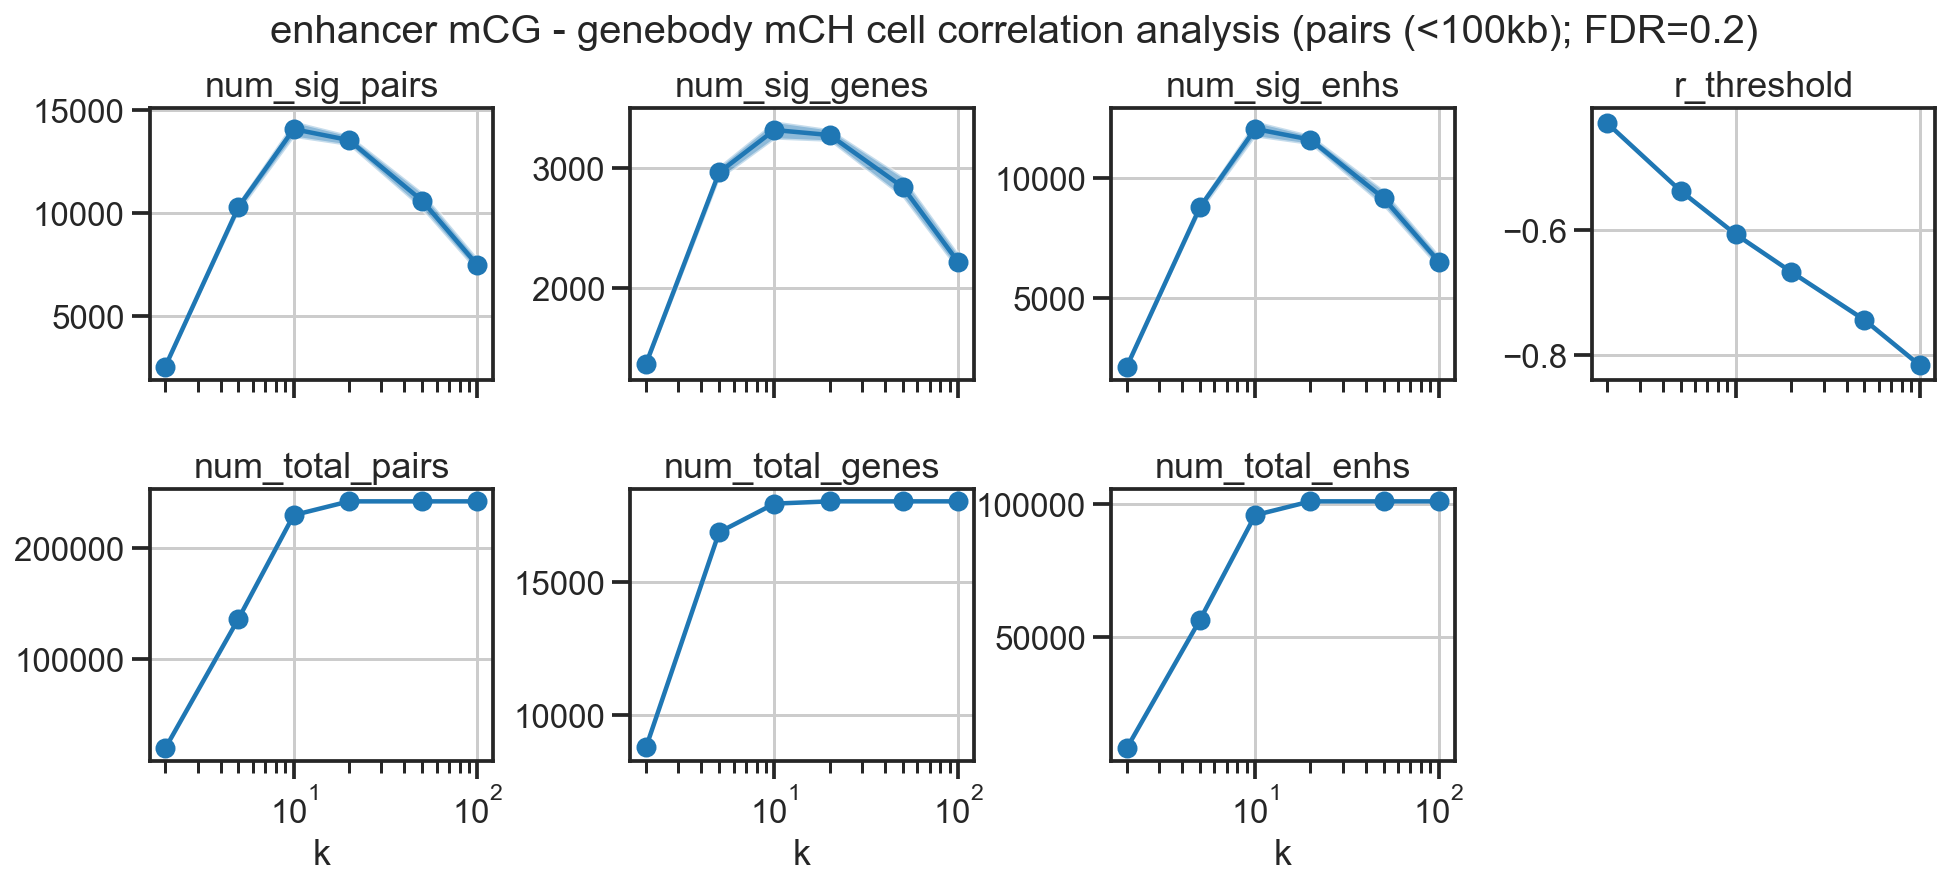

In [44]:
# plot same ks

fig, axs = plt.subplots(2, 4, figsize=(4*4, 3*2), sharex=True)
fig.suptitle('enhancer mCG - genebody mCH cell correlation analysis ({}; FDR={})'.format(label, fdr_threshold), 
             fontsize=20, y=0.99,
            )

axs = axs.flatten()
k_colors = snmcseq_utils.get_grad_colors(len(res_mean['ka'].unique())+2, cmap='Blues_r')
for i_ax, (ax, col) in enumerate(zip(axs, res_mean.columns[3:])):
    _x = _table['ka']
    _y = _table[col]
    _y_std = _table_std[col] 
    ax.plot(_x, _y, '-o')
    ax.fill_between(_x, _y-_y_std, _y+_y_std, alpha=0.5)

    ax.set_xscale('log')
    ax.set_title(col)
    
    if i_ax >= 4:
        ax.set_xlabel('k')
        
axs[-1].axis('off') 
fig.subplots_adjust(wspace=0.4, hspace=0.4)
snmcseq_utils.savefig(fig, output_figure3)
plt.show()

# Plot massive (3nd iteration - restrict kNN within clusters) 

In [54]:
import sys
sys.path.insert(0, "/cndd/fangming/CEMBA/snmcseq_dev")

from multiprocessing import Pool,cpu_count
from functools import partial

from scipy import sparse
from scipy import stats
import importlib
from __init__ import *
from __init__jupyterlab import *
import snmcseq_utils
importlib.reload(snmcseq_utils)

import re
import pickle
import datetime
from scipy import optimize

In [55]:
today = datetime.date.today()
print(today)

2020-08-13


In [56]:
input_enh_gene_table = '/cndd2/fangming/projects/scf_enhancers/results/200521_to_evals.tsv' 

output_figure1 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_restricted_knn_num_sig_dependency_k_only_v1.pdf'.format(today)
output_figure2 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_restricted_knn_num_sig_dependency_k_only_v2.pdf'.format(today)
output_figure3 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_restricted_knn_num_sig_dependency_k_only_v3.pdf'.format(today)
output_figure4 = '/cndd2/fangming/projects/scf_enhancers/results/figures/{}_restricted_knn_num_sig_dependency_k_only_v4.pdf'.format(today)

In [57]:
# enhancer-gene linkage
ti = time.time()
enhancer_gene_to_eval = pd.read_csv(input_enh_gene_table, sep='\t')

print(enhancer_gene_to_eval.shape)
print(time.time()-ti)
enhancer_gene_to_eval.head()

(2589994, 18)
5.998624324798584


,gene,ens,val,val2,val_clustershuffled,val2_clustershuffled,dist,pvalues,fdr<100kb,fdr<200kb,fdr<500kb,fdr<100kb shuffled (cluster label),pvalues2,fdr2<100kb,fdr2<200kb,fdr2<500kb,fdr2<100kb shuffled (cluster label),val_both
0,ENSMUSG00000000001,147520,-0.157895,0.127913,-0.169712,-0.049349,995118,0.288079,0.674683,0.736811,0.827139,1.647931,0.383141,0.745977,0.797076,0.872822,1.955898,-0.285808
1,ENSMUSG00000000001,147522,0.027465,-0.307145,0.064887,0.105591,985740,0.561881,0.830849,0.867082,0.917381,0.958300,0.935264,0.973809,0.979844,0.987476,0.959470,0.334610
2,ENSMUSG00000000001,147523,-0.040376,0.011489,-0.155487,0.014772,983725,0.457686,0.780196,0.825259,0.889141,1.089312,0.580703,0.841673,0.874844,0.922832,1.273339,-0.051866
3,ENSMUSG00000000001,147527,-0.070795,0.111719,-0.088084,0.184594,970444,0.411564,0.755088,0.804341,0.874375,1.183332,0.410358,0.761056,0.809464,0.880982,1.812516,-0.182514
4,ENSMUSG00000000001,147528,0.012583,0.150673,-0.036218,0.147609,969372,0.539123,0.819981,0.858026,0.911467,0.979843,0.345993,0.725803,0.780447,0.862033,2.191506,-0.138090


In [58]:
num_bins = 200
bins = np.linspace(-1, 0.3, num_bins)
fdr_threshold = 0.2
distance_threshold = 1e5

label = 'pairs (<100kb)'

In [59]:
f_pattern = ("/cndd2/fangming/projects/scf_enhancers/results/"
             "corr_analysis_smarter_cells_snmcseq_gene_within_cluster_knn_ka[0-9]*_knn[0-9]*_*_[0-9]_corrs.pkl"
            )

fnames = glob.glob(f_pattern)
iterator = [(int(re.findall("_knn[0-9]+", fname)[0][len("_knn"):]), 
             int(re.findall("_ka[0-9]+", fname)[0][len("_ka"):]), 
             int(re.findall("[0-9]+_corrs.pkl", fname)[0][:-len("_corrs.pkl")]), 
             fname, fname.replace('corrs', 'corrs_idx'),
            ) for fname in fnames]
fnames[:5]

['/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_within_cluster_knn_ka30_knn30_200811_2020-08-13_9_corrs.pkl',
 '/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_within_cluster_knn_ka10_knn10_200811_2020-08-12_0_corrs.pkl',
 '/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_within_cluster_knn_ka100_knn100_200811_2020-08-12_8_corrs.pkl',
 '/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_within_cluster_knn_ka6_knn6_200811_2020-08-13_7_corrs.pkl',
 '/cndd2/fangming/projects/scf_enhancers/results/corr_analysis_smarter_cells_snmcseq_gene_within_cluster_knn_ka3_knn3_200811_2020-08-13_3_corrs.pkl']

In [60]:
res = []
for k, ka, i_sub, output_corr, output_to_correlate in iterator:
    print(k, ka)
    
    # try loading the list
    try:
        with open(output_corr, 'rb') as fh:
            corrs, corrs_shuffled, corrs_shuffled_cells = pickle.load(fh)
        print(corrs.shape, corrs_shuffled.shape, corrs_shuffled_cells.shape)

        with open(output_to_correlate, 'rb') as fh:
            to_correlate = pickle.load(fh)
        print(to_correlate.shape)
    except:
        continue
    
    # dists 
    dists = enhancer_gene_to_eval.loc[to_correlate, 'dist'].values
    print(dists.shape, corrs.shape, corrs[:5])
    
    ## sig numbers
    label_cond = dists < distance_threshold
    track = corrs[label_cond]
    
    ### total numbers with the condition
    num_total_pairs = len(enhancer_gene_to_eval[to_correlate][label_cond])
    num_total_genes = len(enhancer_gene_to_eval[to_correlate][label_cond]['gene'].unique())
    num_total_enhs = len(enhancer_gene_to_eval[to_correlate][label_cond]['ens'].unique())

    hist_shuff, _ = np.histogram(corrs_shuffled, bins=bins, density=True)
    cdf_shuff = np.cumsum(hist_shuff)
    # dist
    hist, _ = np.histogram(track, bins=bins, density=True)
    cdf = np.cumsum(hist)
    # fdr
    fdr = cdf_shuff/(cdf+1e-7)

    # get r_threshold
    # remove nan
    isnan = np.isnan(fdr)
    _y = fdr[~isnan]
    _x = bins[1:][~isnan]
    
    # find r threshold
    f = lambda _x_func: np.interp(_x_func, _x, _y) - fdr_threshold
    if f(-1)*f(0) < 0:
        sol = optimize.root_scalar(f, bracket=(-1, 0))
        if sol:
            r_threshold = sol.root
        else:
            print("failed to detect r_threshold:", k, ka, i_sub)
            continue # failed
    else:
        print("failed to detect r_threshold:", k, ka, i_sub)
        # r_threshold = 0
        continue # failed

    sig_table = enhancer_gene_to_eval[to_correlate][label_cond][track<r_threshold]

    # num_sig
    num_sig_pairs = len(sig_table)
    num_sig_genes = len(sig_table['gene'].unique()) 
    num_sig_enhs = len(sig_table['ens'].unique()) 

    # record
    res.append({
        'ka': ka,
        'k': k,
        'i_sub': i_sub,
        'num_total_pairs': num_total_pairs,
        'num_total_genes': num_total_genes,
        'num_total_enhs': num_total_enhs,
        'num_sig_pairs': num_sig_pairs,
        'num_sig_genes': num_sig_genes,
        'num_sig_enhs': num_sig_enhs,
        'r_threshold': r_threshold,
    })
    
res = pd.DataFrame(res)[[
            'ka',
            'k',
            'i_sub',
            'num_sig_pairs',
            'num_sig_genes',
            'num_sig_enhs',
            'r_threshold',
            'num_total_pairs',
            'num_total_genes',
            'num_total_enhs',
]] 
print(res.shape)
res.head()

30 30
(2246521,) (2246521,) (2246521,)
(2589994,)
(2246521,) (2246521,) [ 0.04295645 -0.03655556 -0.05668289  0.08910514  0.0837806 ]
10 10
(554337,) (554337,) (554337,)
(2589994,)
(554337,) (554337,) [-0.03311075 -0.01917816 -0.16979253 -0.06463467 -0.11638808]
100 100
(2589994,) (2589994,) (2589994,)
(2589994,)
(2589994,) (2589994,) [ 0.05076176 -0.15022418 -0.09360985  0.08591574  0.08211121]
6 6
(121130,) (121130,) (121130,)
(2589994,)
(121130,) (121130,) [-0.06161654 -0.18378072  0.16111354 -0.04173592 -0.13834529]
3 3
(3426,) (3426,) (3426,)
(2589994,)
(3426,) (3426,) [-0.07839597  0.019407   -0.31887967 -0.04074277 -0.02380167]
40 40
(2518105,) (2518105,) (2518105,)
(2589994,)
(2518105,) (2518105,) [ 0.03582921 -0.08618446 -0.09065647  0.08685193  0.08983117]
2 2
(360,) (360,) (360,)
(2589994,)
(360,) (360,) [-0.0748712   0.03731136 -0.0068203  -0.12290687 -0.06670626]
10 10
(563341,) (563341,) (563341,)
(2589994,)
(563341,) (563341,) [-0.04440811  0.06502487 -0.00559765 -0.1564

,ka,k,i_sub,num_sig_pairs,num_sig_genes,num_sig_enhs,r_threshold,num_total_pairs,num_total_genes,num_total_enhs
0,30,30,9,9403,1475,8776,-0.488566,209496,17799,86938
1,10,10,0,3437,1182,3168,-0.394515,50696,13605,20769
2,100,100,8,11003,1510,10282,-0.521165,242446,18062,100876
3,6,6,7,1215,695,1092,-0.330733,11209,6357,4491
4,3,3,3,89,77,72,-0.229126,340,284,128


In [61]:
res_mean = res.groupby(['ka', 'k']).mean().reset_index()
res_std = res.groupby(['ka', 'k']).std().reset_index()

_table = res_mean[res_mean['ka']==res_mean['k']]
_table = _table.sort_values('ka')

_table_std = res_std[res_std['ka']==res_std['k']]
_table_std = _table_std.sort_values('ka')

# res_mean
_table_std.head()

,ka,k,i_sub,num_sig_pairs,num_sig_genes,num_sig_enhs,r_threshold,num_total_pairs,num_total_genes,num_total_enhs
0,2,2,3.02765,1.074968,1.074968,0.707107,0.012665,1.032796,1.032796,0.632456
1,3,3,3.02765,3.784471,2.943920,3.134042,0.011264,12.579083,11.606990,3.645393
2,4,4,3.02765,13.595751,11.165920,11.087531,0.006277,48.893194,38.477122,18.369359
3,5,5,3.02765,18.361796,10.914313,15.058774,0.002967,77.298052,50.445130,26.490250
4,6,6,3.02765,27.876713,18.863251,21.822771,0.004178,98.240069,38.950681,36.047654


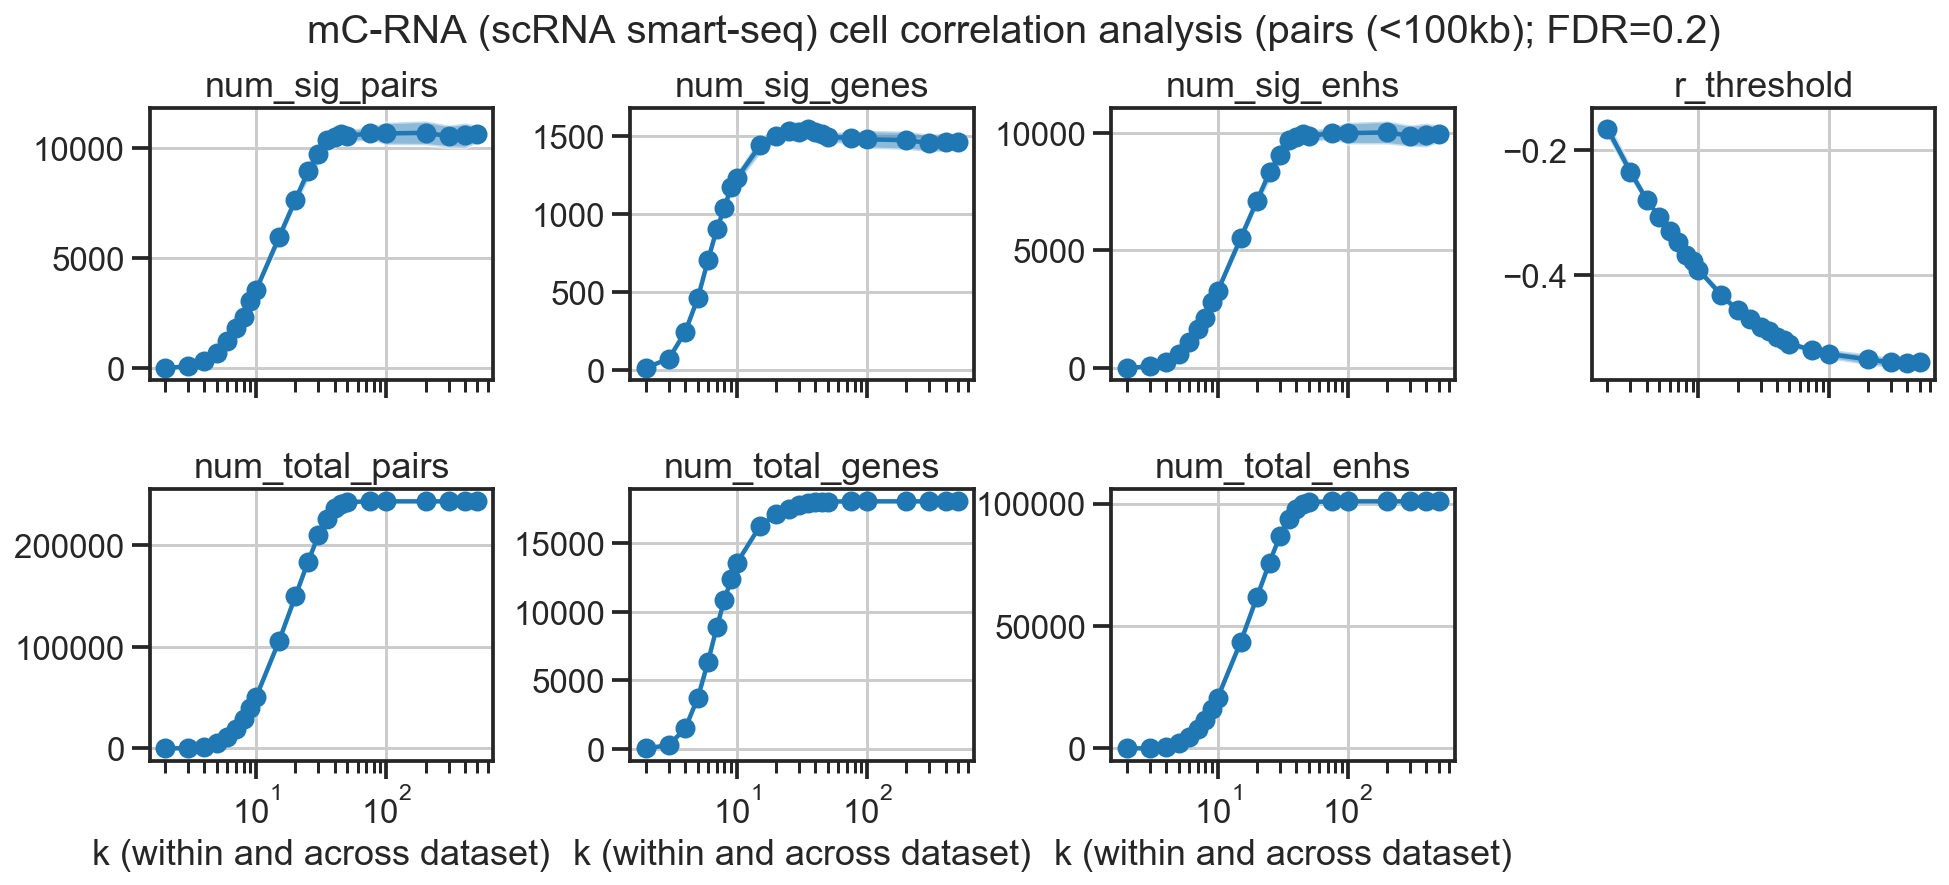

In [62]:
# plot same ks

fig, axs = plt.subplots(2, 4, figsize=(4*4, 3*2), sharex=True)
fig.suptitle('mC-RNA (scRNA smart-seq) cell correlation analysis ({}; FDR={})'.format(label, fdr_threshold), 
             fontsize=20, y=0.99)

axs = axs.flatten()
k_colors = snmcseq_utils.get_grad_colors(len(res_mean['ka'].unique())+2, cmap='Blues_r')
for i_ax, (ax, col) in enumerate(zip(axs, res_mean.columns[3:])):
    _x = _table['ka']
    _y = _table[col]
    _y_std = _table_std[col] 
    ax.plot(_x, _y, '-o')
    ax.fill_between(_x, _y-_y_std, _y+_y_std, alpha=0.5)

    ax.set_xscale('log')
    ax.set_title(col)
    
    if i_ax >= 4:
        ax.set_xlabel('k (within and across dataset)')
        
axs[-1].axis('off') 
fig.subplots_adjust(wspace=0.4, hspace=0.4)
snmcseq_utils.savefig(fig, output_figure3)
plt.show()